## Data Modelling:
----

The purpose of this  section of the project is to find the best model that will 'Find the most predictive feautures for YouTube video views'.  A range of models will be fitted to the data, and will be evaluated using the following metrics : RMSE, MSE, R2 (Regression Metrics). The process of selecting features will be implemented using: Grid Search, Cross Validation, Pipeline for model tuning, evaluation, and data preprocessing in order to streamline the process of fitting a model.
Furthermore, Experimentations will also be done with feature selection. For example, when fitting the basline model for a lasso regression model one text feature will be added to the model before fitting a second model with additional features. The purpose of doing this is to reduce data leakage by ensuring that information from the training data does not leak into the test data, making the model evaluation more reliable. Furthermore this will also ensure that all text data is vectorized consistently throughout this section of the project.

The 'Title' column will not be added to the models in these section of the project because this column will not add any additional meaninful data to the models, this data is also present in both the tags and description column. Including the title column in the model would be unlikely to improve the performance of the model for this reason and could introduce multicolinearity.

Models that will be fit on the data: Linear Regression, Lasso Regression, Ridge Regression, Gradient Boosting Regression, XGBoost Regression. Regression Models will be used for this project because the target variable is a continuous numerical variable, the aim is to predict this feature 'views'. When adressing the project question: 'Find the most predictive feautures for YouTube video views' it is important to understand the relationships between variables in the data.

After fitting the Baseline models, the data will be limited to  only include features which are available at the time of publishing.This will be done so that the project aim can clearly be addressed from a business perspective, including data that is available after the videos have gained popularity can cause data leakage for the models. In real word scenarios, the 'comment_count', 'trending_date' ect. would not be readily available to make predictions on. 

##### Imports:

In [619]:
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns 
import matplotlib as mlp
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
import joblib

#baseline model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

##### Importing Dataframe Pickles:


In [620]:
# Xtrain for the baseline model
X_train_scaled_baseline_p=joblib.load('X_train_scaled_baseline.pkl')
# Xvalidation for the baseline model
X_validation_scaled_baseline_p=joblib.load('X_validation_scaled_baseline.pkl')
# yvalidation for the baseline model
y_validation_baseline_p=joblib.load('y_validation_baseline.pkl')
# ytrain for the baseline model
y_train_baseline_p=joblib.load('y_train_baseline.pkl')


#pipeline/gridsearch data frames
#Xtrain 
X_train_=joblib.load('X_train.pkl')
#ytrain
y_train_=joblib.load('y_train.pkl')
#Xvalidation
X_validation_=joblib.load('X_validation.pkl')
#yvalidation
y_validation_=joblib.load('y_validation.pkl')

##### Editing Pickled dataframes:

In [621]:
X_train1=X_train_.copy() #Copying the x and y train pickles so that additional changes can be made.
y_train1=y_train_.copy() #Copying the x and y train pickles so that additional changes can be made.

X_validation1=X_validation_.copy() #Copying the x and y validation pickles so that additional changes can be made.
y_validation1=y_validation_.copy() #Copying the x and y validation pickles so that additional changes can be made.

In [622]:
X_train1.select_dtypes('object').columns


Index(['video_id', 'title', 'channel_title', 'tags', 'thumbnail_link',
       'description', 'tags_lower', 'title_lower', 'description_lower',
       'tags_no_chars', 'title_no_chars', 'tags_no_dates', 'tags_no_numerics',
       'tags_clean', 'category_id_title'],
      dtype='object')

In [623]:
drops=['video_id','title','channel_title','tags','thumbnail_link','description','tags_lower','title_lower','tags_no_chars','title_no_chars','tags_no_dates','tags_no_numerics','category_id_title']
X_train1.drop(columns=drops, inplace=True)




In [624]:
drops=['video_id','title','channel_title','tags','thumbnail_link','description','tags_lower','title_lower','tags_no_chars','title_no_chars','tags_no_dates','tags_no_numerics','category_id_title']
X_validation1.drop(columns=drops, inplace=True)

In [625]:
X_train1['tags']=X_train1['tags_clean']
X_train1['description']=X_train1['description_lower']



In [626]:
X_validation1['tags']=X_validation1['tags_clean']
X_validation1['description']=X_validation1['description_lower']

In [627]:
X_train1.drop(columns=['description_lower','tags_clean'], inplace=True)

In [628]:
X_validation1.drop(columns=['description_lower','tags_clean'], inplace=True)

 ## Linear Regression Baseline Model: Tags column only
---------

A Baseline model is a very simplistic model that is important for understanding the data better/faster.This model will be used as a benchmark to compare my actual model to, it will help with assessing the quality of the more complex model later on in this assignment.

The Linear Regression Baseline model was chosen because the increase/decrease of the number of views (numeric variable) will be measured in relation to the feature variables (A linear relationship).

In [710]:
#Instantiate the model and fit it
Linear_reg = LinearRegression()
Linear_reg.fit(X_train_scaled_baseline_p, y_train_baseline_p)

#Predictions on the test set
y_predicted_lin_baseline = Linear_reg.predict(X_validation_scaled_baseline_p)

#Evaluation
mse = mean_squared_error(y_validation_baseline_p, y_predicted_lin_baseline)
rmse = np.sqrt(mse)
r2 = r2_score(y_validation_baseline_p, y_predicted_lin_baseline)

#Evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.7283084711045227
Root Mean Squared Error (RMSE): 0.8534099080187215
R-squared (R2): 0.8285503318387402


##  Linear Regression Baseline Model Evaluation:
----


 Mean Squared Error (MSE): 0.7283084711045227: The Mean squared error for the baseline model is high which indicates that the current model is not good at predicting the target variable. The mean squard error works by calcualting the average squared distance between the predicted values and the actual values. High Mean squared error means that the model is not very accurate in predicting which features contribute to the target. High mean square error shows that the current model is potentially underfitting, it is not able to capture the complexity of the data. 


Root Mean Squared Error (RMSE): 0.8534099080187215: The baseline model has a high root mean squared error which means that the model is making a lot of errors and less precise predictions.


R-squared (R2): 0.8285503318387402: The baseline model has a high R-squared value which reveals that the model fits the data well. This shows that there is a high level of correlation betwee the columns that are present in the target and feature variables.

The  Baseline model had high MSE and RMSE values, showing bad accuracy in its predictions. Additionally, the R squared score of 0.8285503318387402indicated that the model explained a large portion of the variance in the target variable.

  ## Plotting the Linear Regression Baseline Model residuals:
---

 The residuals are the difference between the observed value of the independent variable and the predicted value from the model. 


 One of the linear regression assumptions is that the residuals must be normally distributed. A histogram will be used to plot the distribution of the residuals in the data.

In [630]:
#Calculating residuals
residuals_baseline = y_validation_baseline_p - y_predicted_lin_baseline

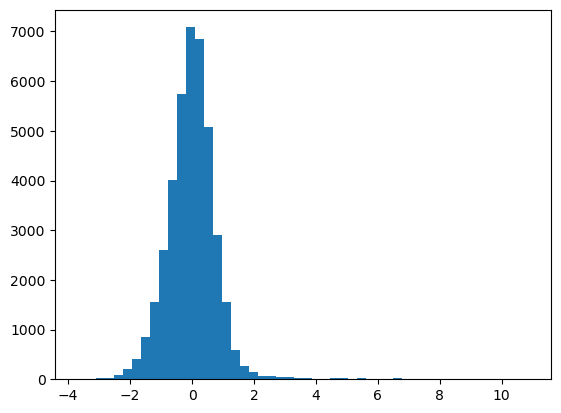

In [631]:
#Plotting the histogram using the residuals - increasing the bin size makes it easier to see details in the histogram
plt.hist(residuals_baseline, bins = 50)
#Showing the histogram
plt.show()

The above histogram shows that the residuals in the baseline model are normally distributed. This is a good sign that the choice to use a linear model for is an appropriate choice for my task.

## Checking for Homoscedasticity:
------
Homoscedasticity is the assumption that the variance of the residuals is consistent across the feature variables. For linear models, the variance in the dependent variable must be evenly spread across the independent variable. 

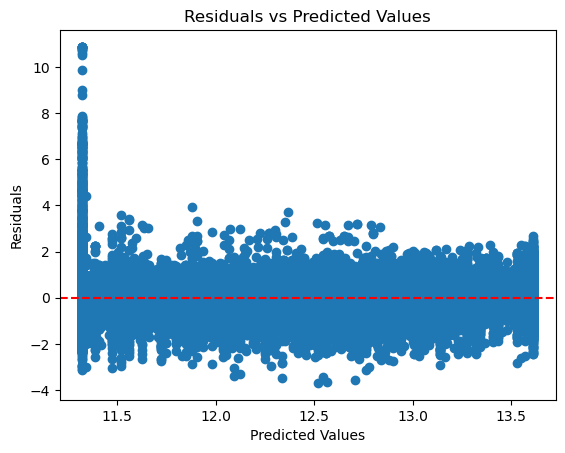

In [738]:
# Plotting the residuals against the predicted values
plt.scatter(y_predicted_lin_baseline, residuals_baseline)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

- Residuals are mostly Homoskedastic.

## Baseline Model Coefficients:
----



The coefficients from the Baseline model measure the strength and direction of the relationship between the feature and target variable. Looking at the coefficients from the model give insight into whether the variables that the linear regression model has predicted are the most/least important predictors of the target variable ('Views').

In [632]:
# Accessing the coefficients 
coefficient = Linear_reg.coef_ 

# Printing the coefficients
print(f'Coefficients: {coefficient}')

Coefficients: [-6.48890383e-01  3.43255009e+00  7.62126400e+00  1.04660776e+00
  6.48127226e-01  7.21877827e-02  6.26875354e-01 -2.24238732e-01
 -3.70269528e-02 -2.53899222e+00 -6.56487949e-01  2.79926983e-02
  3.17524028e-01  3.75704344e-01  6.18285918e-01 -2.36584895e-01
  6.71920280e-01 -9.50865273e-02  3.23861949e-01 -5.55400561e-01
  7.76470088e-02  3.38193830e-01 -6.44512859e-01 -1.49235245e+00
  1.62913133e-04  3.28073695e-01  7.78059724e-01  5.57769170e-01
  2.32784922e+00  9.06554574e-01 -6.05971427e-01  4.04602002e-01
  2.47855433e-01  5.93425798e-01 -6.22166312e-01 -3.94442328e-01
  7.00936784e-01  1.30420187e+00  9.60475019e-02  4.54907855e-01
  1.42952289e+00  1.05496530e+00  3.17982481e+00 -2.71811339e+00
  1.69355694e-01  5.86529203e-01 -2.47147503e-01  9.69586054e-01
  4.32009328e-01  9.04598446e-01 -5.30927543e-03 -5.52771926e-01
 -1.71536830e-01  2.70276190e-01 -1.35002865e-01 -1.43527995e+00
 -6.08202579e-01 -2.79850533e-02  2.05678785e-01  1.41248512e-01
  7.2812463

##### Baseline Model Coefficients table:

In [633]:
# The coefficients from the baseline model put into a dataframe
baseline_coeffs = pd.DataFrame({"Feature":X_train_scaled_baseline_p.columns.tolist(),"Coefficients":Linear_reg.coef_ }) # A dataframe with both coefficients and the features.

In [634]:
baseline_coeffs # Baseline coefficients as a table

,Feature,Coefficients
0,category_id,-0.648890
1,likes,3.432550
2,dislikes,7.621264
3,comment_count,1.046608
4,trending_date_month,0.648127
...,...,...
105,vs,0.622541
106,wars,-1.087955
107,world,0.350463
108,youtube,-0.592152


##### Sorting Coefficients:

In [635]:
baseline_coeffs_ordered_most = baseline_coeffs.sort_values(by='Coefficients', ascending=False).head(20) #sorting values in ascending order by their coefficients to find the most predictive features.

The table below shows the variables with the top 20 highest coefficients. A positive coefficient reveals that there is a postitive relationship between the feature variables and the target variable. The positive coefficients from the Baseline model reveal that there is a strong relationship between both the likes and dislikes column. This observation is not surprising becausevideos with a high number of either likes/dislikes ect are likely to be recommended to more users due to Youtube's algorithm. However, it is interesting to see that the like column is more significant than the dislikes column which shows that the number of dislikes a video recives contributes more than dislikes. 

  If we exclude both the likes and dislikes column and focus on the tags we can see that the most significant tokens are: hip, super, episode, season. From this we can see that videos with references to television shows and/or videos with positive associations have strong impact on the number of views. 

  Moving on from the Baseline model, the 'likes' and dislikes columns could be dropped so that the data that the model uses has is only data that would be available during the time that the video was posted. Limiting the data in this way would help to address the busines aspect of predicting the video views. eg: Description, Tags ect. Both likes and dislikes are data that would be obtained after the video has recieved some attention. 



In [636]:
baseline_coeffs_ordered_most # Ordered in descending order to show the most predictive features.

,Feature,Coefficients
2,dislikes,7.621264
1,likes,3.432550
42,hip,3.179825
91,super,2.737328
28,episode,2.327849
82,season,1.822427
40,hd,1.429523
37,funny,1.304202
109,مسلسل,1.150781
41,highlights,1.054965


In [637]:
baseline_coeffs_ordered_least = baseline_coeffs.sort_values(by='Coefficients', ascending=True).head(20) #sorting values in ascending order by their coefficients to find the least predictive features.

The table below shows the variables with the bottom 20 lowest coefficients. A negative coefficient reveals that there is a negative relationship between the feature variables and the target variable. The negative coefficients from the Baseline model reveal that there is a weak relationship with the target variable with both the words 'hop', 'rap' and the column 'publish_time_year' . It is interesting to see that both the words 'hop' and 'rap' from the tags column are considered the least predictive, they relate to a specific genre of music. Although this dataset focuses on the most popular YouTube videos, this model shows that videos with these tags do not gain highest amount of views.

If we look at top of the ordered list we can see that there are a number of non english words: 'le','de'. This could suggest that videos that are not in english as less likely to gain as many views. 

In [638]:
baseline_coeffs_ordered_least # Ordered in descending order to show the least predictive features.

,Feature,Coefficients
43,hop,-2.718113
9,publish_time_year,-2.538992
77,rap,-1.807151
23,de,-1.492352
55,le,-1.435280
103,vlog,-1.359765
81,review,-1.161562
106,wars,-1.087955
74,paul,-1.037549
98,trump,-0.846161


##### Plotting Coefficients:

##### Most predictive features for the target variable:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'dislikes'),
  Text(1, 0, 'likes'),
  Text(2, 0, 'hip'),
  Text(3, 0, 'super'),
  Text(4, 0, 'episode'),
  Text(5, 0, 'season'),
  Text(6, 0, 'hd'),
  Text(7, 0, 'funny'),
  Text(8, 0, 'مسلسل'),
  Text(9, 0, 'highlights'),
  Text(10, 0, 'comment_count'),
  Text(11, 0, 'records'),
  Text(12, 0, 'smith'),
  Text(13, 0, 'izle'),
  Text(14, 0, 'songs'),
  Text(15, 0, 'family'),
  Text(16, 0, 'john'),
  Text(17, 0, 'movie'),
  Text(18, 0, 'nba'),
  Text(19, 0, 'official')])

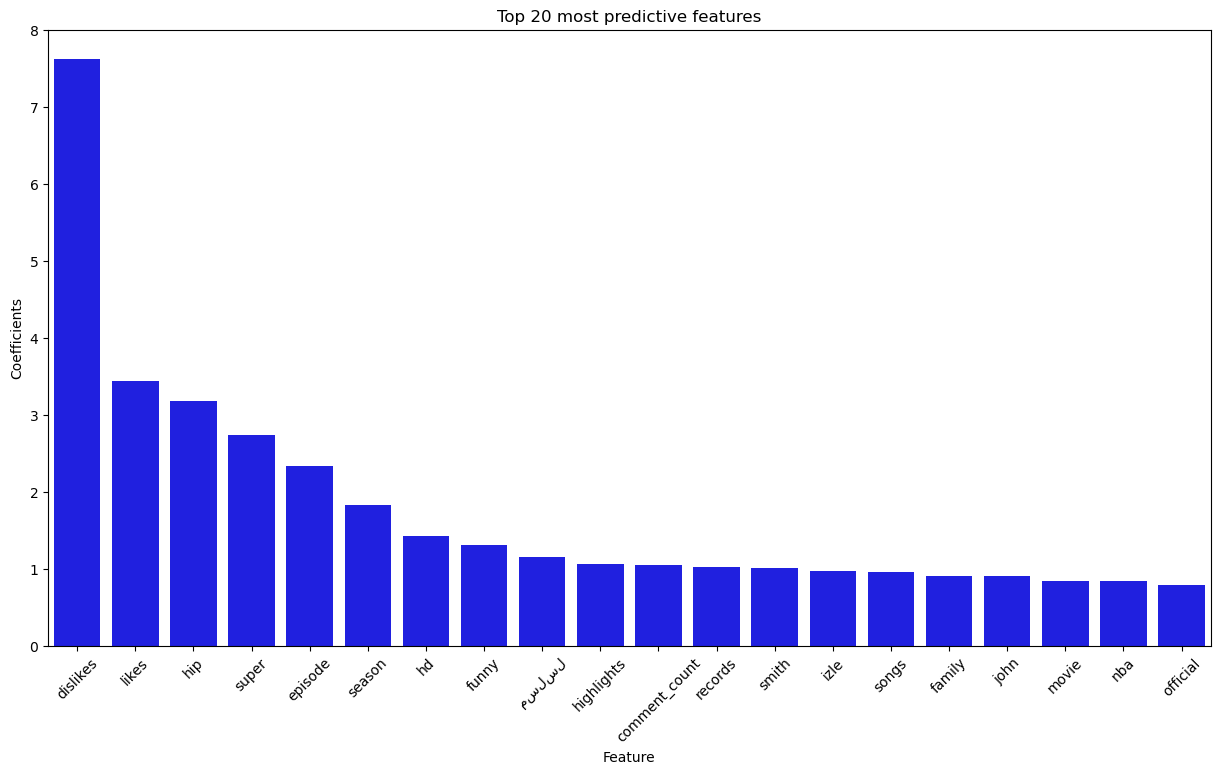

In [639]:
#Plotting the most predictive features for the target variable
plt.figure(figsize=(15,8))
sns.barplot(data=baseline_coeffs_ordered_most, x="Feature", y="Coefficients", color="blue")
plt.title('Top 20 most predictive features')
plt.xticks(rotation=45)

##### Least predictive features for the target variable:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'hop'),
  Text(1, 0, 'publish_time_year'),
  Text(2, 0, 'rap'),
  Text(3, 0, 'de'),
  Text(4, 0, 'le'),
  Text(5, 0, 'vlog'),
  Text(6, 0, 'review'),
  Text(7, 0, 'wars'),
  Text(8, 0, 'paul'),
  Text(9, 0, 'trump'),
  Text(10, 0, 'top'),
  Text(11, 0, 'song'),
  Text(12, 0, 'team'),
  Text(13, 0, '10'),
  Text(14, 0, 'category_id'),
  Text(15, 0, 'comedy'),
  Text(16, 0, 'fortnite'),
  Text(17, 0, 'les'),
  Text(18, 0, 'film'),
  Text(19, 0, 'youtube')])

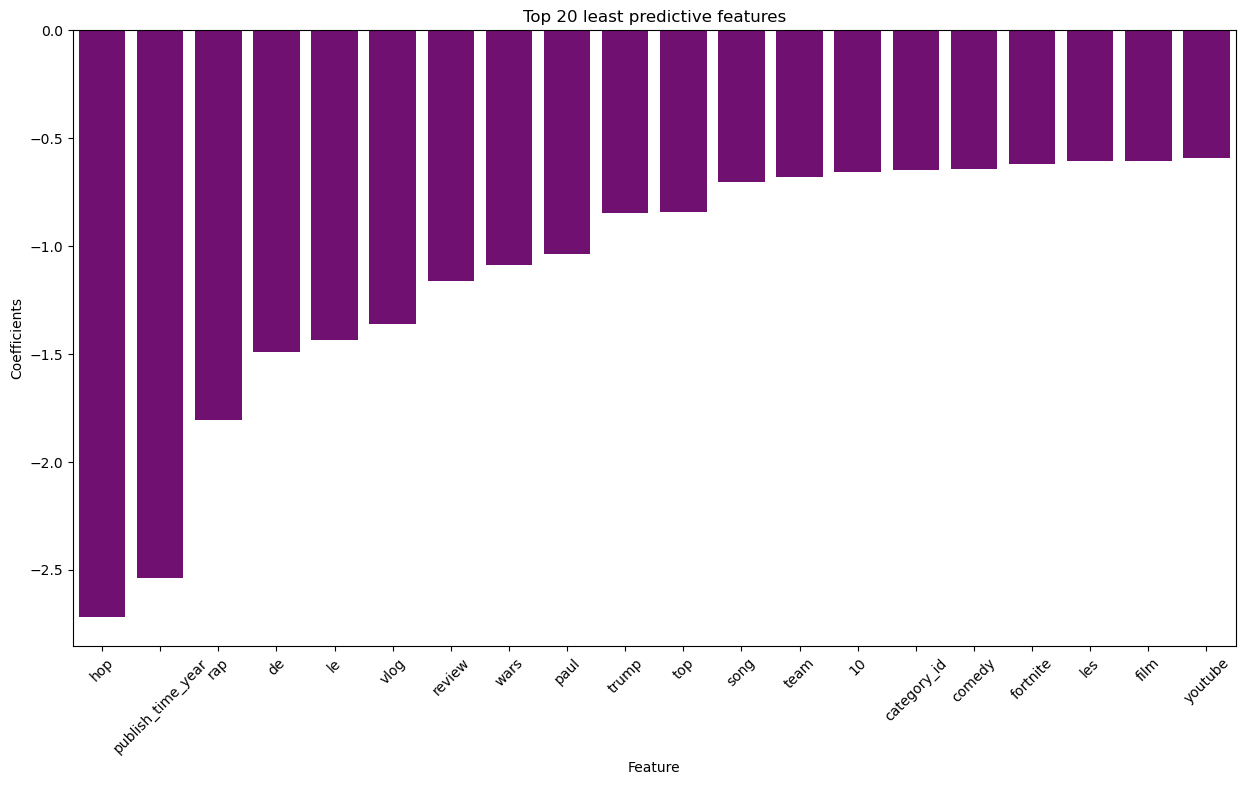

In [640]:
# Plotting the least predictive features for the target variable:
plt.figure(figsize=(15,8))
sns.barplot(data=baseline_coeffs_ordered_least, x="Feature", y="Coefficients", color='purple') 
plt.title('Top 20 least predictive features')
plt.xticks(rotation=45)

In [641]:
Linear_reg.intercept_ # if x is equal to 0, the intercept is the value of y at the value of x.

9.190096125410133

## Baseline Lasso Regression: Tags column only
-----
This Baseline model will be fit only on the tags column. After the results from this Baseline model have been obtained, more data will be added to the model to see if the model improves (eg: description). 

L1 Regularisation - Forces the weights/coefficients of the least informative features to be '0'.

In [708]:
from sklearn.linear_model import Lasso

#instantiate the model 
lasso_reg = Lasso(alpha=0.1) # Alpha is the regularisation penalty 

#fitting the model on the training data
lasso_reg.fit(X_train_scaled_baseline_p, y_train_baseline_p)
 
# Evaluate model performance on test set
y_pred = lasso_reg.predict(X_validation_scaled_baseline_p)
 
# Model Score
print(" Lasso Model Score: ", lasso_reg.score(X_validation_scaled_baseline_p, y_validation_baseline_p))
 
# Lasso Coefficient
lasso_reg.coef_


 Lasso Model Score:  0.6991568612391986


array([-0.        ,  2.50869582,  5.33978516,  0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.  

## Baseline Lasso Regression Evaluation: 
--------

In [709]:
# evaluation metrics
mse_baseline = mean_squared_error(y_validation_baseline_p, y_pred)
rmse_baseline = np.sqrt(mse_baseline)
r2_baseline = r2_score(y_validation_baseline_p, y_pred)

# print evaluation metrics
print("Mean Squared Error (MSE): ", mse_baseline)
print("Root Mean Squared Error (RMSE): ", rmse_baseline)
print("R-squared (R2): ", r2_baseline)

Mean Squared Error (MSE):  1.277964599074526
Root Mean Squared Error (RMSE):  1.1304709633929242
R-squared (R2):  0.6991568612391986


Mean Squared Error (MSE):  1.277964599074526

The Mean Squared Error for the Baseline Lasso Regression model is low which shows that the predictions that the Lasso regression model makes are close to the actual values. This reveals that the model is able to capture the patterns in the data. 


Root Mean Squared Error (RMSE):  1.1304709633929242

The Root Mean Squared Error for the Baseline Lasso Regression model is significantly low which reveals that the predictions that the model makes have a low average distance from the true values.


R-squared (R2):  0.6991568612391986

The R2 value for this Baseline Lasso Regression model is slightly low which suggests that the model is not able to explain the variance in the target variable with the feature variables. 

When looking at both the Low r2, RMSE and MSE values it could be said that overall the model is not performing well, potentially underfitting the data, or lacking enough features to capture the relationships in the data. These values are not surprising because the data is limited to only the tags column. Adding more features eg: the description column could improve the R2 value. 

The Baseline Lasso Regression model needs improvement in accuracy and explaining the variance in the target variable. The MSE/RMSE values reveal that there were some prediction errors. The R-squared score reveals that the model explained a portion of the variance in the target variable. At this stage adding additional columns to the data was considered. 


##### Baseline model coefficients table:

In [644]:
# The coefficients from the baseline model put into a dataframe
baseline_lasso_coeffs = pd.DataFrame({"Feature":X_train_scaled_baseline_p.columns.tolist(),"Coefficients":lasso_reg.coef_ }) # A dataframe with both coefficients and the features.

In [645]:
baseline_lasso_coeffs # Baseline coefficients as a table

,Feature,Coefficients
0,category_id,-0.000000
1,likes,2.508696
2,dislikes,5.339785
3,comment_count,0.000000
4,trending_date_month,-0.000000
...,...,...
105,vs,0.000000
106,wars,-0.000000
107,world,0.000000
108,youtube,0.000000


##### Sorting coefficients: 

In [646]:
baseline_coeffs_ordered_most_lasso = baseline_lasso_coeffs.sort_values(by='Coefficients', ascending=False).head(20) #sorting values in ascending order by their coefficients to find the most predictive features.
baseline_coeffs_ordered_least_lasso = baseline_lasso_coeffs.sort_values(by='Coefficients', ascending=True).head(20) #sorting values in ascending order by their coefficients to find the least predictive features.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'dislikes'),
  Text(1, 0, 'likes'),
  Text(2, 0, 'news'),
  Text(3, 0, 'records'),
  Text(4, 0, 'real'),
  Text(5, 0, 'react'),
  Text(6, 0, 'rap'),
  Text(7, 0, 'punjabi'),
  Text(8, 0, 'pop'),
  Text(9, 0, 'paul'),
  Text(10, 0, 'one'),
  Text(11, 0, 'official'),
  Text(12, 0, 'none'),
  Text(13, 0, 'night'),
  Text(14, 0, 'new'),
  Text(15, 0, 'season'),
  Text(16, 0, 'nba'),
  Text(17, 0, 'music'),
  Text(18, 0, 'movies'),
  Text(19, 0, 'movie')])

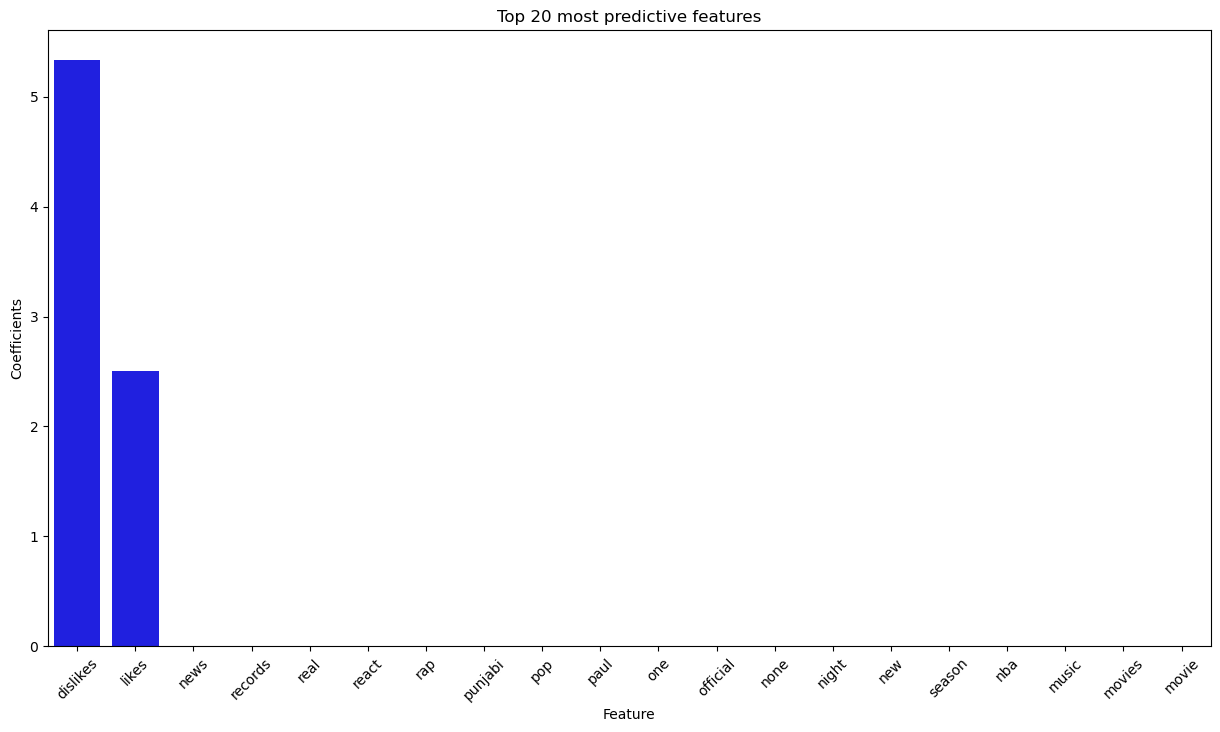

In [647]:
#Plotting the most predictive features for the target variable
plt.figure(figsize=(15,8))
sns.barplot(data=baseline_coeffs_ordered_most_lasso, x="Feature", y="Coefficients", color="blue")
plt.title('Top 20 most predictive features')
plt.xticks(rotation=45)

The baseline lasso regression model has chosen both the dislikes and likes column as the most predictive features. If we exclude both the likes and dislikes column and focus on the tags we can see that there are no other features that are considered significant. This reveals that the Baseline lasso regression model considered all other variables as insignificant. 


An alpha of 0.1 is considered a moderate value. In order to increase the coefficients of other variables in the data both the 'likes' and 'dislikes' column could be dropped, or the alpha value could be lowered. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'category_id'),
  Text(1, 0, 'real'),
  Text(2, 0, 'react'),
  Text(3, 0, 'rap'),
  Text(4, 0, 'punjabi'),
  Text(5, 0, 'pop'),
  Text(6, 0, 'paul'),
  Text(7, 0, 'one'),
  Text(8, 0, 'official'),
  Text(9, 0, 'none'),
  Text(10, 0, 'night'),
  Text(11, 0, 'news'),
  Text(12, 0, 'new'),
  Text(13, 0, 'nba'),
  Text(14, 0, 'music'),
  Text(15, 0, 'movies'),
  Text(16, 0, 'movie'),
  Text(17, 0, 'man'),
  Text(18, 0, 'makeup'),
  Text(19, 0, 'make')])

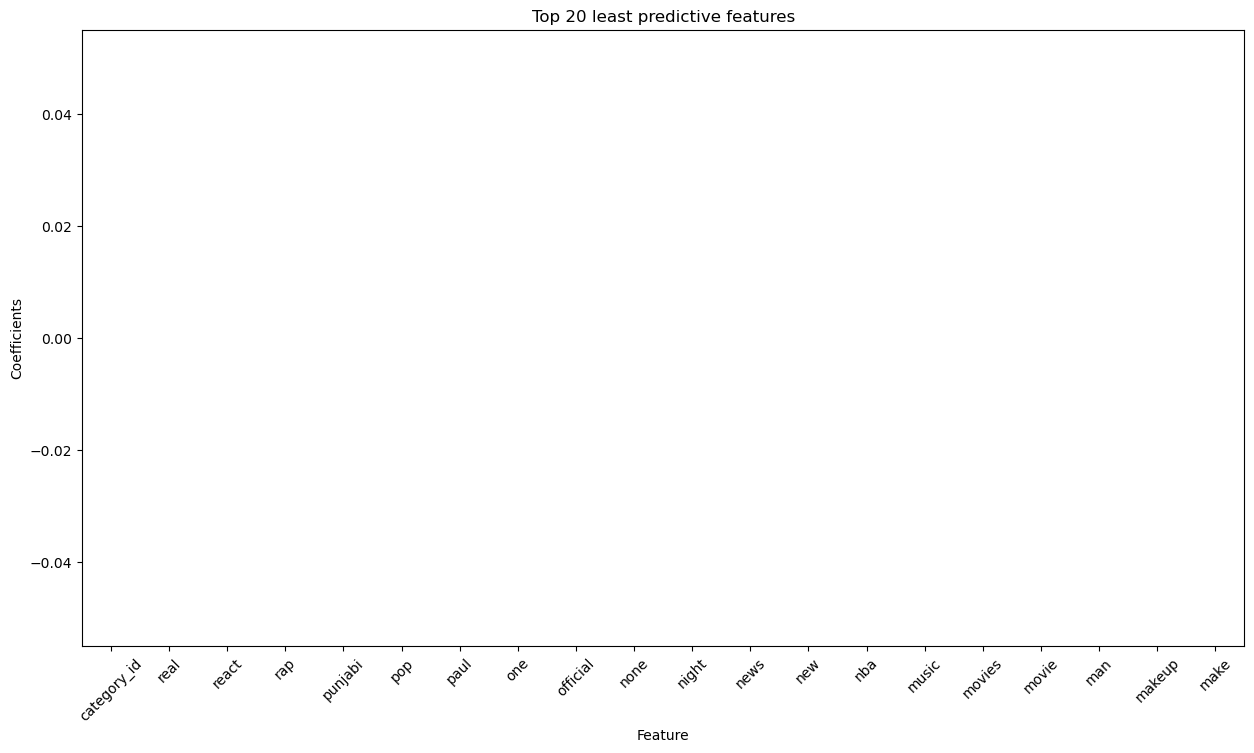

In [648]:
#Plotting the least predictive features for the target variable
plt.figure(figsize=(15,8))
sns.barplot(data=baseline_coeffs_ordered_least_lasso, x="Feature", y="Coefficients", color="blue")
plt.title('Top 20 least predictive features')
plt.xticks(rotation=45)

The least predictive features for the target variable have all been reduced to '0' this is not surprising because Lasso regression shrinks the least significant variables to '0'.

## Grid Search:
-------


Grid search is used to find the best combination of  model hyperperameters so that the performance of the model is optimized. During Grid Search a range of hyperperameters are provided for the model to choose from (Each model has a specific set of hyperperameters). It is important to note that Grid search can be computationally expensive depending on the number of hyperperameters that have been provided. 

##### Data Frame for the Grid Search:

In [649]:
df_grid.select_dtypes('object').columns

object_vars = ('video_id', 'title', 'channel_title','thumbnail_link',
       'description', 'tags_lower', 'title_lower', 'description_lower',
       'tags_no_chars', 'title_no_chars', 'tags_no_dates', 'tags_no_numerics',
       'tags_clean', 'category_id_title')


In [650]:
# Dropping columns including likes and dislikes
df_grid.drop(columns=object_vars, inplace=True)

KeyError: "[('video_id', 'title', 'channel_title', 'thumbnail_link', 'description', 'tags_lower', 'title_lower', 'description_lower', 'tags_no_chars', 'title_no_chars', 'tags_no_dates', 'tags_no_numerics', 'tags_clean', 'category_id_title')] not found in axis"

In [651]:
df_grid #Confirming the columns were dropped.

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_count,thumbnail_link,...,tags_no_dates,tags_no_numerics,tags_clean,category_id_title,trending_date_month,trending_date_day,trending_date_year,publish_time_month,publish_time_day,publish_time_year
0,2kyS6SvSYSE,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,13.525659,10.960027,7.995307,9.677528,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,...,shantell martin,shantell martin,shantell martin,People and Blogs,11,14,2017,11,13,2017
1,1ZAPwfrtAFY,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",14.698775,11.484382,8.723719,9.449672,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,...,last week tonight trump presidencylast week to...,last week tonight trump presidencylast week to...,last week tonight trump presidencylast week to...,Entertainment,11,14,2017,11,13,2017
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",14.975981,11.891595,8.582981,9.009692,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,...,racist supermanrudymancusokingbachracistsuperm...,racist supermanrudymancusokingbachracistsuperm...,racist supermanrudymancusokingbachracistsuperm...,Comedy,11,14,2017,11,12,2017
3,puqaWrEC7tY,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,"rhett and link|""gmm""|""good mythical morning""|""...",12.745978,9.227492,6.502790,7.671827,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,...,rhett and linkgmmgood mythical morningrhett an...,rhett and linkgmmgood mythical morningrhett an...,rhett and linkgmmgood mythical morningrhett an...,Entertainment,11,14,2017,11,13,2017
4,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",14.555413,11.792343,7.595890,9.771041,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,...,ryanhigahigatvnigahigai dare youidyrhpcdaresno...,ryanhigahigatvnigahigai dare youidyrhpcdaresno...,ryanhigahigatvnigahigai dare youidyrhpcdaresno...,Entertainment,11,14,2017,11,12,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202305,fn5WNxy-Wcw,KINGDOM HEARTS III – E3 2018 Pirates of the Ca...,Kingdom Hearts,20,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Pirat...",14.148069,10.753190,6.218600,9.198167,https://i.ytimg.com/vi/fn5WNxy-Wcw/default.jpg,...,kingdom heartskh3kingdom hearts 3pirates of th...,kingdom heartskhkingdom hearts pirates of the ...,kingdom heartskhkingdom hearts pirates of the ...,Gaming,6,14,2018,6,12,2018
202306,zAFv43lxqHE,YMS: The Visit,YourMovieSucksDOTorg,24,[none],11.847496,9.319733,4.787492,7.585281,https://i.ytimg.com/vi/zAFv43lxqHE/default.jpg,...,none,none,none,Entertainment,6,14,2018,6,13,2018
202307,zSXG5I6Y2fA,Ungut umgeschult – Grünwald als Ersthelfer am ...,Grünwald Freitagscomedy,24,"Günter Grünwald|""Grünwald Freitagscomedy""|""Gün...",10.167965,5.899897,2.484907,2.197225,https://i.ytimg.com/vi/zSXG5I6Y2fA/default.jpg,...,gnter grnwaldgrnwald freitagscomedygnter grnwa...,gnter grnwaldgrnwald freitagscomedygnter grnwa...,gnter grnwaldgrnwald freitagscomedygnter grnwa...,Entertainment,6,14,2018,6,12,2018
202308,5d115sePmaU,Assassin's Creed Odyssey: E3 2018 Welt-Enthüll...,Assassin's Creed DE,20,"Assassin's Creed|""Assassins Creed""|""Assassin's...",13.945836,9.609184,7.259820,7.370231,https://i.ytimg.com/vi/5d115sePmaU/default.jpg,...,assassins creedassassins creedassassins creed ...,assassins creedassassins creedassassins creed ...,assassins creedassassins creedassassins creed ...,Gaming,6,14,2018,6,11,2018


## Pipeline and Column Transformer:
----
The column transformer adds transformations to specific columns in the dataframe. The column transformer will be used for preprocessing text data: Categories, Description, Tags. One hot encoding and Count Vectorizer will be used within the column transformer. After the data has gone through the column transformer it will then pass through the pipeline. The pipeline will  include scaling (processes that will be applied to each column in the dataframe). We can also specify which model will be used in the pipeline eg: Lasso. Pipelines are useful for streamlining column transformations, making operations quicker.

Using a pipeline/column transformer for preprocessing text data later on as opposed to doing it earlier during the datan cleaning stage can help to reduce data leakage by ensuring that preprocessing is done consistently. 


In [656]:
#imports
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder
#column transformer for vectorizing text for each text data column - will work with the pipeline to streamline the model.
from sklearn.feature_extraction.text import CountVectorizer


ColumnTransformer and Pipeline Code:
------

In [667]:
# To set up a temporary directory for caching pipeline results.
from tempfile import mkdtemp
# Set up a directory to cache the pipeline results.
cachedir = mkdtemp()

ct = ColumnTransformer([ #initializing the column transformer
    ('tags', CountVectorizer(max_features=300,stop_words='english'),'tags'),  # Vectorizing the tags.
    ('descr',CountVectorizer (max_features=300, stop_words='english'), 'description'), # Vectorizing the description.
    ('categories',OneHotEncoder(),['category_id'])], #One hot encoding for the catgories.
    remainder='passthrough') # Any columns that have not been specified in the column transformer will passthrough into the pipeline.

pipe = Pipeline([('processing',ct), #initializing the pipeline
     ('scaling', MaxAbsScaler()), #adding scaling to the pipeline - this will be added to every column.
     ('model',Lasso()), #Lasso regression model will be fit on the data after it has passed the pipeline.
],memory=cachedir)   # stores the results in on disk for future usage - helps to improve efficiency.       



In [668]:
X_train1 #Confirming that the correct dataframe will be used for fitting the model.

,category_id,likes,dislikes,comment_count,trending_date_month,trending_date_day,trending_date_year,publish_time_month,publish_time_day,publish_time_year,tags,description
49510,17,7.266129,4.919981,5.690359,12,26,2017,12,25,2017,none,الجزائر algerie
55308,20,8.422443,3.526361,7.125283,1,26,2018,1,25,2018,youtubeusefrtrailergameplay frgameplayprankhel...,"(nous ne sommes pas tout à fait 300k, je sais ..."
69020,17,5.468060,1.609438,2.639057,4,5,2018,4,4,2018,ogcniceogcnfootballzappingligue nissamario bal...,"images inédites, insolites ou déjà cultes : re..."
143708,10,11.119735,5.361292,8.478244,3,11,2018,3,10,2018,nctnct taeyongjaehyunjungwookunchenletenrenjun...,nct 127 official\nhttp://www.nct2018.com\nhttp...
186040,10,7.285507,5.361292,5.976351,3,19,2018,3,17,2018,none,شخص يحاول إسعاد الا خرين.\nفإبتسم دائمأ ياصديق...
...,...,...,...,...,...,...,...,...,...,...,...,...
30906,10,11.376407,7.412764,8.197539,4,25,2018,4,12,2018,florencethemachineskyfullofsongvirginemialtern...,sky full of song\ndirected by ag rojas\n \nava...
194085,10,12.776247,10.480494,10.527526,5,4,2018,5,1,2018,danielle bregolicash me oussidecash me outside...,bhad bhabie gucci flip flops ft. lil yachty ⛵️...
27844,22,5.036953,2.944439,3.135494,4,4,2018,3,28,2018,none,nan
132019,24,8.253228,3.401197,5.899897,1,12,2018,1,11,2018,rhett and linkgood mythical morerhett and link...,we bring out the six breakfast biscuit contest...


In [669]:
pipe.fit(X_train1,y_train1) #Fitting the pipline on the training data.

/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/pipeline.py:359: UserWarning: Persisting input arguments took 1.71s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


Pipeline(memory='/var/folders/1_/mgb_spqs3b71d7zj3xh9r_6m0000gn/T/tmpsx727gh4',
         steps=[('processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tags',
                                                  CountVectorizer(max_features=300,
                                                                  stop_words='english'),
                                                  'tags'),
                                                 ('descr',
                                                  CountVectorizer(max_features=300,
                                                                  stop_words='english'),
                                                  'description'),
                                                 ('categories', OneHotEncoder(),
                                                  ['category_id'])])),
                ('scaling', MaxAbsScaler()), ('model', Lasso())])

## Gridsearch for Lasso and Ridge Regression model: Added 'Description' column 
--------

Both the tags and description column have been added to this model to observe any improvements in the model.

Lasso - A linear regression technique that uses L1 Regularisation. It is used to prevent overfitting in Linar regression models by adding a penalty to the cost function, encouraging the model to select only the most important features (feature selection). Lasso regression forces the coefficients of the least important features to be '0'.

Ridge- A linear regression technique that uses L2 Regularisation. Ridge regression helps to prevent overfitting by adding a penalty to the cost function. It shrinks the coefficients towards '0', but not exactly '0' which helps to reduce the influence of the least important features/ highly correlated features. 

Using these regularisation techniques are important for the objective of this project: 'Predicting which features contribute the most to YouTube video views' because they will help with prioritizing the most informative/ predictive features. 

In [670]:
from sklearn.model_selection import GridSearchCV

alpha_li=[0.01,0.1, 1, 10, 100, 1000] # list of alpha values = hyperperameters for the regression model - strength of regularisation - lower alpha= lower strenght

params = [{'scaling':[MaxAbsScaler()], 
           'model':[Lasso(max_iter=1000),Ridge(max_iter=1000)],
           'model__alpha': alpha_li}]
         

In [671]:
#gridsearch for regression         
gs = GridSearchCV(estimator=pipe,
                      param_grid=params,
                      scoring='r2',
                      cv=3) # cross validation


Cross validation has been included in the grid search for evaluating the model by training different models on subsets of the data. Using cross validation is good for preventing data leakage: The training data containing information about the target. Data leakage leads to high training scores, but low performance on real life data.

In [672]:
gs.fit(X_train1, y_train1) # fit dataset on the training data set.

/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/pipeline.py:359: UserWarning: Persisting input arguments took 1.46s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(
/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)


GridSearchCV(cv=3,
             estimator=Pipeline(memory='/var/folders/1_/mgb_spqs3b71d7zj3xh9r_6m0000gn/T/tmpsx727gh4',
                                steps=[('processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('tags',
                                                                         CountVectorizer(max_features=300,
                                                                                         stop_words='english'),
                                                                         'tags'),
                                                                        ('descr',
                                                                         CountVectorizer(max_features=300,
                                                                                         stop_words='english'),
                                                                         'description'),
                                                                        ('categories',
                                                                         OneHotEncoder(),
                                                                         ['category_id'])])),
                                       ('scaling', MaxAbsScaler()),
                                       ('model', Lasso())]),
             param_grid=[{'model': [Lasso(alpha=0.01), Ridge(max_iter=1000)],
                          'model__alpha': [0.01, 0.1, 1, 10, 100, 1000],
                          'scaling': [MaxAbsScaler()]}],
             scoring='r2')

In [673]:
# best parameter for the gridsearch
print(gs.best_params_)

{'model': Lasso(alpha=0.01), 'model__alpha': 0.01, 'scaling': MaxAbsScaler()}


The grid search has chosen Lasso regression over ridge regression as the best regularisation for the regression model.

best_params_ has been used to show the best parameters that the grid search has chosen for optimum performance. 
It is important to note that a low alpha value was chosen (the lowest). The grid search has chose a value of alpha that did not turn the coefficients of less important features to '0', retaining a higher number of features. However, a low number of alpha increases the risk of overfitting 

In [711]:
# accessing the lasso model to get the best parameter that the model has chosen 
gs.best_estimator_

Pipeline(memory='/var/folders/1_/mgb_spqs3b71d7zj3xh9r_6m0000gn/T/tmpsx727gh4',
         steps=[('processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tags',
                                                  CountVectorizer(max_features=300,
                                                                  stop_words='english'),
                                                  'tags'),
                                                 ('descr',
                                                  CountVectorizer(max_features=300,
                                                                  stop_words='english'),
                                                  'description'),
                                                 ('categories', OneHotEncoder(),
                                                  ['category_id'])])),
                ('scaling', MaxAbsScaler()), ('model', Lasso(alpha=0.01))])

In [712]:
y_predicted_lin_baseline=gs.predict(X_validation1) # predicted values of the target variable.

In [713]:
mse = mean_squared_error(y_validation_baseline_p, y_predicted_lin_baseline)
rmse = np.sqrt(mse)
print(f"The Mean Squared Error is: {mse}")
print(f"The Root Mean Squared Error is: {rmse}")
r2 = r2_score(y_validation_baseline_p, y_predicted_lin_baseline)
print(f"The R Squared Score is: {r2}")

The Mean Squared Error is: 3.395321857328653
The Root Mean Squared Error is: 1.8426399152652297
The R Squared Score is: 0.20071394356179806


The grid search model's performance was quite poor. The MSE/ RMSE values show a high amount of prediction error. The low R-squared score suggests that the model did not accurately explain the variance in the target variable ‘views’

In [677]:
best_pipe=gs.best_estimator_

In [678]:
preprocessing=best_pipe.named_steps['processing']

feature_names=preprocessing.get_feature_names_out() #accessing the feature names from the pipeline for plotting the coefficients

In [679]:
best_pipe.named_steps['model'].coef_ #getting the coefficients from the best model 

array([-0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

## Plotting the best model coefficients:
----

##### Best model coefficients table:

In [680]:
coefs = pd.DataFrame( #turning the coefficients into a dataframe
    best_pipe.named_steps['model'].coef_,
    columns=["Coefficients importance"],
    index=feature_names,
)

In [681]:
coefs #printing the coefficient table

,Coefficients importance
tags__action,-0.000000
tags__affet,-0.000000
tags__al,0.000000
tags__american,0.000000
tags__angeles,0.000000
...,...
remainder__trending_date_day,-0.000000
remainder__trending_date_year,0.000000
remainder__publish_time_month,-0.003386
remainder__publish_time_day,-0.000000


##### Sorting the coefficients:

In [682]:
coef_top_20=coefs.sort_values('Coefficients importance',ascending=False)[:20] #top 20 variabless - predictive of the target
coef_bottom_20=coefs.sort_values('Coefficients importance',ascending=True)[:20] #bottom 20 variables - predictive of the target

##### Plotting the coefficients:

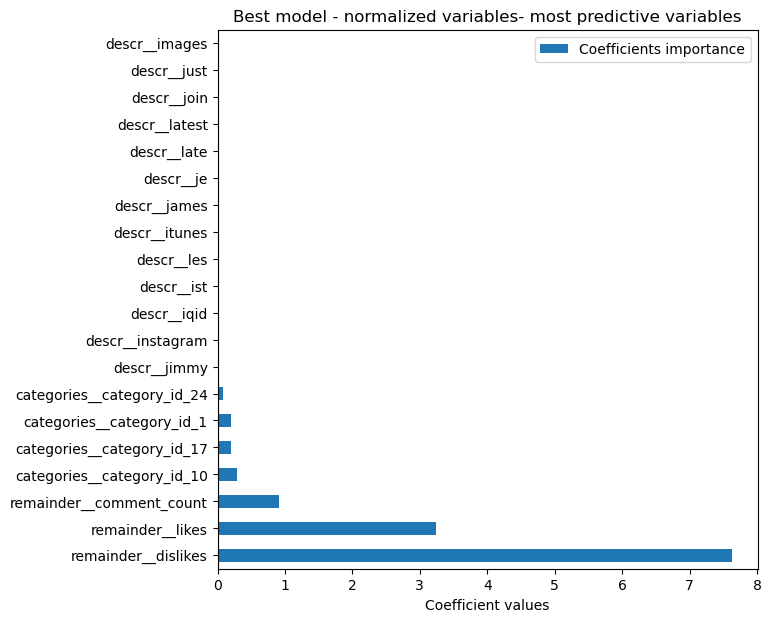

In [683]:
coef_top_20.plot.barh(figsize=(9, 7))
plt.title("Best model - normalized variables- most predictive variables")
plt.xlabel("Coefficient values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

The best model has chosen the likes, dislikes column and comment_count as the most predictive variables for the model. This reveals that there is a strong relationship between both the likes, dislikes and number of comments column with the target. As mentioned beforehand with the previous models, this observation is not surprising because videos with a high number of either likes/dislikes ect are likely to be recommended to more users due to Youtube's algorithm, increasing the video views. Furthermore, the most popular videos are likly to gain a large amount of comments from users. As seen before, the dislike column is more significant than the likes column which shows that the number of dislikes a video recives contributes more than likes.

Again, if we exclude both the likes, dislikes column and comment_count, focusing  on the remaining variables we can see that: category_id_10, category_id_17, category_id_1, category_id_24 have been selected as the most predictive variables for the target.


- category_id_10: Music
- category_id_17: Sports
- category_id_1: Film and Animation
- category_id_24: Entertainment

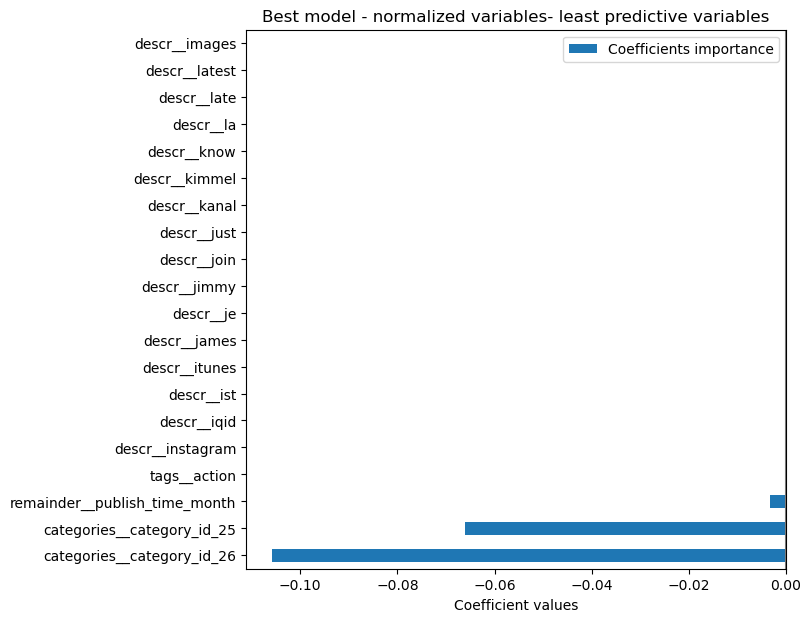

In [684]:
coef_bottom_20.plot.barh(figsize=(9, 7))
plt.title("Best model - normalized variables- least predictive variables")
plt.xlabel("Coefficient values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

The best model has chosen the category_id_25, category_id_26 column and publish_time_month as the least predictive variables for the model. This reveals that there is a weaker relationship between both the category_id_25, category_id_26 and publish_time_month column with the target

- category_id_25: News and Politics
- category_id_26: Howto & Style


## Dropping columns based on Lasso and Ridge Best model - Model improvements
-------

The likes, dislikes and comment count columns (along with all other columns that are not available at the time of publishing) will be dropped. Dropping these columns with help the model to align better with the business question for this project: 'Predicting YouTube video views based on set features'. Colmns that are only available after the video has gained publicity can not be used to accurately predict the number of views the video will recieve. 

The grid search for this section includes both Lasso and Ridge regression. The Grid search will choose the best Regularisation method for the data.

In [685]:
# Dropping columns that are not available at the time of publishing. -train set
dropss=['likes','dislikes','comment_count','trending_date_month','trending_date_day','trending_date_year']
X_train2 = X_train1.drop(columns=dropss)
y_train2 = y_train1.copy()

# Dropping columns that are not available at the time of publishing. -test set
X_validation2 = X_validation1.drop(columns=dropss)
y_validation2= y_validation1.copy()

In [686]:
gs.fit(X_train2,y_train2) #fitting the model to the train set for the model - gridsearch

/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/pipeline.py:359: UserWarning: Persisting input arguments took 1.25s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(
/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)


GridSearchCV(cv=3,
             estimator=Pipeline(memory='/var/folders/1_/mgb_spqs3b71d7zj3xh9r_6m0000gn/T/tmpsx727gh4',
                                steps=[('processing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('tags',
                                                                         CountVectorizer(max_features=300,
                                                                                         stop_words='english'),
                                                                         'tags'),
                                                                        ('descr',
                                                                         CountVectorizer(max_features=300,
                                                                                         stop_words='english'),
                                                                         'description'),
                                                                        ('categories',
                                                                         OneHotEncoder(),
                                                                         ['category_id'])])),
                                       ('scaling', MaxAbsScaler()),
                                       ('model', Lasso())]),
             param_grid=[{'model': [Lasso(alpha=0.01), Ridge(max_iter=1000)],
                          'model__alpha': [0.01, 0.1, 1, 10, 100, 1000],
                          'scaling': [MaxAbsScaler()]}],
             scoring='r2')

In [687]:
# best parameter for the gridsearch
gs.best_params_

{'model': Lasso(alpha=0.01), 'model__alpha': 0.01, 'scaling': MaxAbsScaler()}

gs.best_params_ has revealed that the model has chosen Lasso regression Regularisation with an alpha of 0.01. These values are the same as the previous model that was fit with the columns that were available after the video was published (Comment_count, likes, dislikes ect.) This shows that removing these features has little effect of what type of regularisation technique is preffered.

In [688]:
# accessing the lasso model to get the best parameter that the model has chosen 
gs.best_estimator_

Pipeline(memory='/var/folders/1_/mgb_spqs3b71d7zj3xh9r_6m0000gn/T/tmpsx727gh4',
         steps=[('processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tags',
                                                  CountVectorizer(max_features=300,
                                                                  stop_words='english'),
                                                  'tags'),
                                                 ('descr',
                                                  CountVectorizer(max_features=300,
                                                                  stop_words='english'),
                                                  'description'),
                                                 ('categories', OneHotEncoder(),
                                                  ['category_id'])])),
                ('scaling', MaxAbsScaler()), ('model', Lasso(alpha=0.01))])

In [689]:
y_predicted_lin_baseline=gs.predict(X_validation1) # predicted y values 

In [690]:
mse_drops = mean_squared_error(y_validation_baseline_p, y_predicted_lin_baseline)
rmse_drops = np.sqrt(mse_drops)
print(f"The Mean Squared Error is: {mse_drops}")
print(f"The Root Mean Squared Error is: {rmse_drops}")
r2_drops = r2_score(y_validation_baseline_p, y_predicted_lin_baseline)
print(f"The R Squared Value is: {r2_drops}")

The Mean Squared Error is: 3.395321857328653
The Root Mean Squared Error is: 1.8426399152652297
The R Squared Value is: 0.20071394356179806


This model's performance was not very accurate/reliable. The MSE/ RMSE values were quite high which suggests that there is a large amount of average error in the predictions. The R2 value shows that the features explain only a small amount of the target variable's variance. This suggests that the model did not capture the underlying patterns in the data,  or relationships effectively.

In [691]:
best_pipe=gs.best_estimator_

In [692]:
preprocessing=best_pipe.named_steps['processing']

feature_names=preprocessing.get_feature_names_out() # getting the feature names for the model.

In [693]:
best_pipe.named_steps['model'].coef_ #Printing the coefficients for the model.

array([ 0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.  

In [694]:
coefs = pd.DataFrame( #Printing the coefficients as a dataframe.
    best_pipe.named_steps['model'].coef_,
    columns=["Coefficients importance"],
    index=feature_names,
)

##### Table of  Coefficients:

In [695]:
coefs #Printing the coeffcient table. 

,Coefficients importance
tags__action,0.000000
tags__affet,-0.000000
tags__al,0.000000
tags__american,0.000000
tags__angeles,0.000000
...,...
categories__category_id_43,0.000000
categories__category_id_44,-0.000000
remainder__publish_time_month,-0.224812
remainder__publish_time_day,-0.000000


##### Sorting the coefficients:

In [696]:
coef_top_20=coefs.sort_values('Coefficients importance',ascending=False)[:20]
coef_bottom_20=coefs.sort_values('Coefficients importance',ascending=True)[:20]

##### Plotting the coefficients:

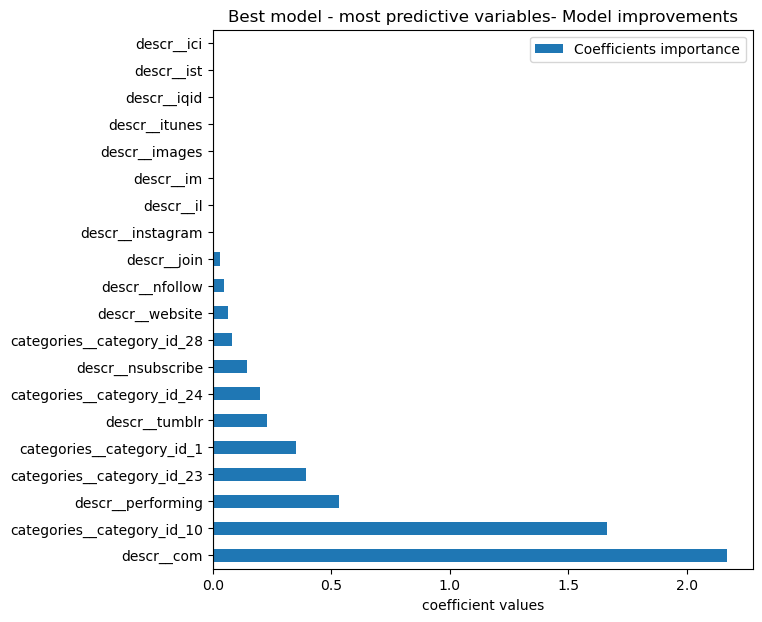

In [697]:
coef_top_20.plot.barh(figsize=(9, 7))
plt.title("Best model - most predictive variables- Model improvements")
plt.xlabel("coefficient values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

After dropping some columns we can see that that most predictive features are: category_id_10, category_id_23, category_id_1, the word performing (description). These coefficients reveal that the categories that are related to entertainment ie: music, comedy and film/animation are the most predictive of video views. Users are more likely to watch videos relating to these categories. Furthermore, this idea is also seen through the words (description and tags) that are considered the most predictive: 'performing', 'tumblr'. These words are also related to entertainment. This pattern is not surprising because Youtube is an entertainment/education and information video sharing platform. Users are more likely to give the most views to entertainment based videos. 

The most predictive feature is the domain extension 'com'. This feature will be ignored because it does not reveal anything specific about the amount of views.  

-category_id_10: Music

-category_id_23: Comedy

-category_id_1: Film and Animation

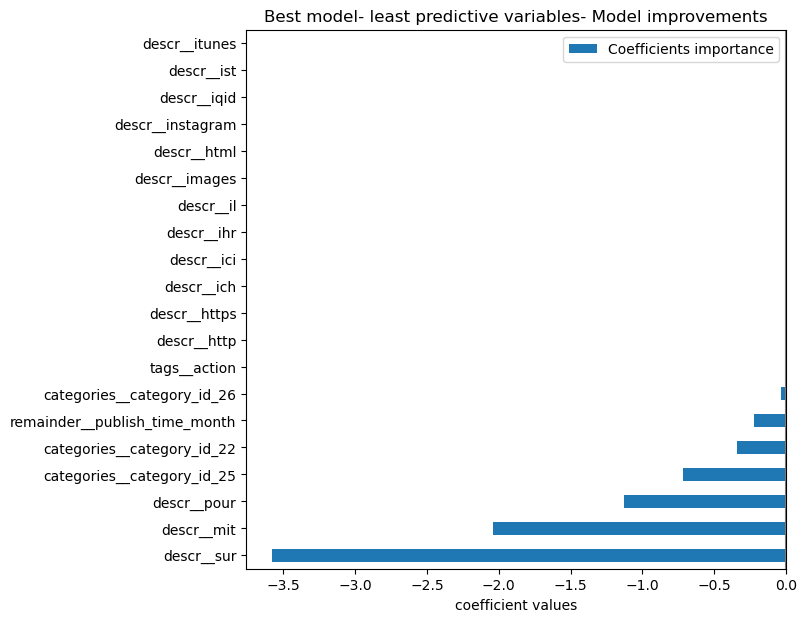

In [698]:
coef_bottom_20.plot.barh(figsize=(9, 7))
plt.title("Best model- least predictive variables- Model improvements")
plt.xlabel("coefficient values")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

After dropping some columns we can see that that least predictive features are: words/ tokens that include text from different languages eg: French ect. 'sur', 'mit','pour'. This could reveal that videos with description that are not in English are less likely to gain a large amount of views. Despite the fact that the dataset contains videos that are trending, the model has revealed that non english descriptions are less likely to do exceedingly well. This could be due to the fact that English is a language that is spoken globally more than any other language. However, this would need to be explored further. 

Furthermore, the model has chosen the categories: category_id_25: News and Politics , category_id_22: People and Blogs , category_id_26: Howto & Style. This shows that users are less likely to view content that is informational based.

Experimenting with other models: XG Boost and Gradient Boosting regression
-------

 Gradient Boosting regression: Used for predicting continuous target variables (for this assigment:views). In gradient boosting regression multiple decision trees are fit in order to improve the accuracy of the final  model,they are trained to correct the previous trees errors. For this specific project Gradient Boosting regression will be used for experimentation purposes. Although Gradient Boosting regression does not have a built in feature selection capabilities like other models, it could still be useful for measuring how much a feature contributes to reducing the loss function. Feature importance scores can help in understanding how important certain features are for the target variable. 

 XGBoost: Is an enhanced version of Gradient Boosting regression, it  can be used for selecting the most important features in the data. Unlike Gradient Boosting regression, CGBoost has built in feature selection capabilities.

In [699]:
!pip install xgboost #installing xgboost so it can be imported

In [700]:
#from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb 
from xgboost import XGBRegressor  # For regression tasks

## Gradient Boosting Regression Baseline model:
-------
Following the previous model, this model will also be fit on a dataset without the 'likes' and 'dislikes' column (an other columns that are not available at the time of publishing).

In [701]:
#New pipline with no model- only scaling
pipe_no_model = Pipeline([('processing',ct), 
     ('scaling', MaxAbsScaler())],memory=cachedir)       

In [702]:
#fitting the data on the pipeline 
X_train2_model=pipe_no_model.fit_transform(X_train2)
X_validation2_model=pipe_no_model.transform(X_validation2)

/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/pipeline.py:359: UserWarning: Persisting input arguments took 1.66s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


In [703]:
#instantiating the model
model_grad_boost=GradientBoostingRegressor()

#fitting the model
model_grad_boost.fit(X_train2_model,y_train2)

GradientBoostingRegressor()

In [704]:
#scoring the model
model_grad_boost.score(X_validation2_model,y_validation2)

0.44153247732612055

Gradient Boosting Regression Baseline Model - Evaluation:
-----------

In [724]:
mse_base_GBR = mean_squared_error(y_validation_baseline_p, y_predicted_lin_baseline)
rmse_base_GBR = np.sqrt(mse_base_GBR)
print(f"The Mean Squared Error is: {mse_base_GBR}")
print(f"The Root Mean Squared Error is: {rmse_base_GBR}")
r2_base_GBR = r2_score(y_validation_baseline_p, y_predicted_lin_baseline)
print(f"The R Squared Value is: {r2_base_GBR}")

The Mean Squared Error is: 1.9302350317041748
The Root Mean Squared Error is: 1.3893289861311375
The R Squared Value is: 0.5456071585203004


 The low MSE and RMSE values show a good accuracy of the predictions. However, an R-squared value of 0.5456071585203004 shows that there is still a large amount of unexplained variance in the data. 

Gradient Boosting Regression/ XGBoost with GridSearch:
----
- Warning this code takes a long time to run

In [705]:
param_gradbr = [{'model':[GradientBoostingRegressor()],
                  'model__learning_rate': [0.01, 0.1, 1,5], #how strongly the algorithm will correct errors/ adapt - default = 0.1 
                  'model__min_samples_leaf': [1, 2, 5, 10], # default value is 1 - a low value increases the risk of overfitting with small datasets.
                  #'model__n_estimators' : [100,500,1000,1500], # number of individual decision trees - each tree corrects the previous trees mistakes.
                  'model__max_depth'    : [1,3,6,9] # default value is 3 - a high value increases the risk of overfitting 
                 }

                 ,
                 {'model':[XGBRegressor()],
                  'model__learning_rate': [0.01,0.1,1,5],
                  'model__min_samples_leaf':[1, 2, 5, 10],
                  #'model__n_estimators':[100,500,1000,1500],
                  'model__max_depth': [1,3,6,9],
                  'model':[XGBRegressor()]
                 }
                 ]

gs_gradient = GridSearchCV(estimator=pipe,
                      param_grid=param_gradbr,
                      scoring='neg_mean_squared_error',
                      cv=3)


In [736]:
gs_gradient.fit(X_train2, y_train2) #Fitting the model on X and y train

/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/oyindao

[08:04:14] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.



/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/oyindao

[08:04:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[08:04:21] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[08:04:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.



/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/oyindao

[08:04:28] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[08:04:32] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[08:04:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.



/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/oyindao

[08:04:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[08:04:42] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[08:04:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.



/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/oyindao

[08:04:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[08:04:53] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[08:04:56] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.



/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/oyindao

[08:05:00] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[08:05:05] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[08:05:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.



/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/oyindao

[08:05:13] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[08:05:18] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[08:05:22] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.



/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/oyindao

[08:05:27] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[08:05:31] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[08:05:36] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.



/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/oyindaomole/anaconda3/envs/Capstone/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/oyindao

[08:05:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[08:05:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.

[08:05:49] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "min_samples_leaf" } are not used.



KeyboardInterrupt: 

In [ ]:
gs_gradient.best_params_

{'model': GradientBoostingRegressor(learning_rate=0.01, max_depth=1),
 'model__learning_rate': 0.01,
 'model__max_depth': 1,
 'model__min_samples_leaf': 1}

In [ ]:
best_model_boost = gs_gradient.best_estimator_
best_params_boost = gs_gradient.best_params_

In [ ]:
y_predicted_lin_baseline_gs=gs_gradient.predict(X_validation2) # predicted y values 

In [725]:
mse_drops = mean_squared_error(y_validation2, y_)
rmse_drops = np.sqrt(mse_drops)
print(f"The Mean Squared Error is: {mse_drops}")
print(f"The Root Mean Squared Error is: {rmse_drops}")
r2_drops = r2_score(y_validation2, y_predicted_lin_baseline)
print(f"The R Squared Value is: {r2_drops}")

The Mean Squared Error is: 1.9302350317041748
The Root Mean Squared Error is: 1.3893289861311375
The R Squared Value is: 0.5456071585203004


This model's performance was quite good. The MSE/ RMSE values were low, showing a small average error in the predictions the model makes. The R2 value shows that the chosen features explain a meaningful portion of the target variable variance. This reveals that the model  captured the underlying patterns or relationships to a fair degree.

In [726]:
best_pipe=gs_gradient.best_estimator_

In [727]:
preprocessing=best_pipe.named_steps['processing']

feature_names=preprocessing.get_feature_names_out() # getting the feature names for the model.

In [729]:
feature_importances = best_pipe.named_steps['model'].feature_importances_

In [731]:
feature_importances = pd.DataFrame(
    best_pipe.named_steps['model'].feature_importances_,
    columns=["Feature Importance"],
    index=feature_names
)

In [732]:
feature_importances

,Feature Importance
tags__action,0.0
tags__affet,0.0
tags__al,0.0
tags__american,0.0
tags__angeles,0.0
...,...
remainder__trending_date_day,0.0
remainder__trending_date_year,0.0
remainder__publish_time_month,0.0
remainder__publish_time_day,0.0


Pickling the gridsearch output:

In [ ]:
#joblib.dump(gs_gradient, 'grid_search_gradient.pkl')

In [ ]:
# Load the file back
grid_name = joblib.load('grid_search_gradient.pkl')

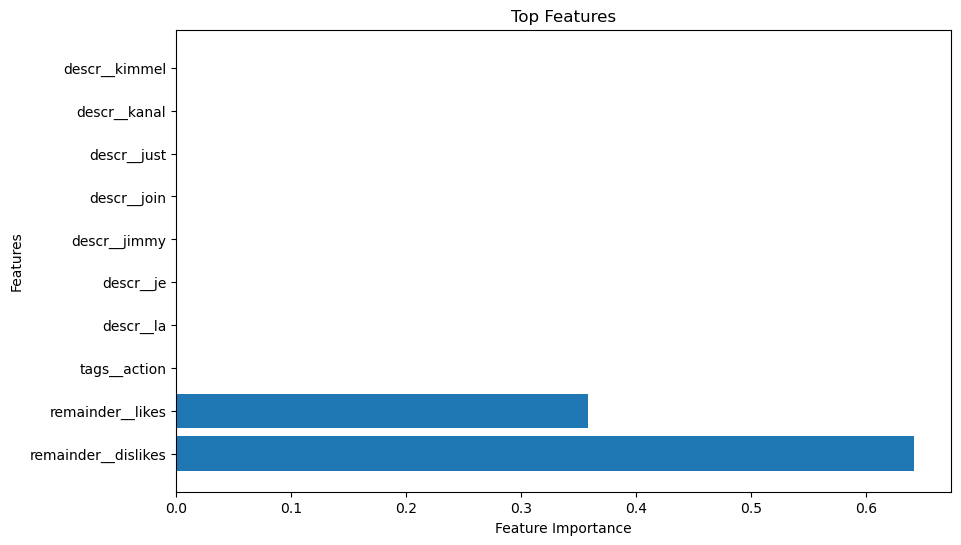

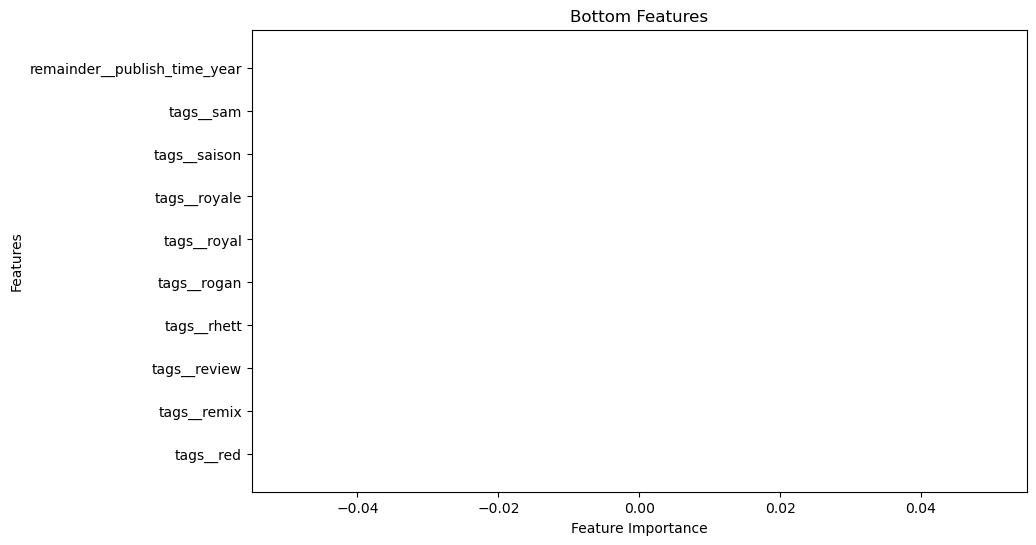

In [733]:
# Sort the feature importances in descending order
sorted_importances = feature_importances.sort_values(by="Feature Importance", ascending=False)

# Plot the top features
top_features = sorted_importances.head(10)  # Change the number 10 to the desired number of top features to plot
plt.figure(figsize=(10, 6))
plt.barh(top_features.index, top_features["Feature Importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Top Features")
plt.show()

# Plot the bottom features
bottom_features = sorted_importances.tail(10)  # Change the number 10 to the desired number of bottom features to plot
plt.figure(figsize=(10, 6))
plt.barh(bottom_features.index, bottom_features["Feature Importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Bottom Features")
plt.show()


## Final Model Decision:
-----

Linear Regression Model:

Baseline Lasso Regression Model with Tags only: The assumption that adding more text features would improve the model.

- Mean Squared Error (MSE): 1.277964599074526 
- Root Mean Squared Error (RMSE): 1.1304709633929242 
- R-squared (R2): 0.6991568612391986


For the final model I have chosen the Gradient Boosting Regressor with a 0.01 learning rate and max_depth = 1. This model gave a low mse score alongside a low rsme score. Furthermore, the R2 value shows that the model has captured a moderate amount of the underlying patterns/ relationships in the data to a fair degree. In comparison the the other models that were used, this model produced the best results. 

Most predictive features are:

In [743]:
baseline_coeffs_ordered_most

,Feature,Coefficients
2,dislikes,7.621264
1,likes,3.432550
42,hip,3.179825
91,super,2.737328
28,episode,2.327849
82,season,1.822427
40,hd,1.429523
37,funny,1.304202
109,مسلسل,1.150781
41,highlights,1.054965


In [744]:
baseline_coeffs_ordered_least

,Feature,Coefficients
43,hop,-2.718113
9,publish_time_year,-2.538992
77,rap,-1.807151
23,de,-1.492352
55,le,-1.435280
103,vlog,-1.359765
81,review,-1.161562
106,wars,-1.087955
74,paul,-1.037549
98,trump,-0.846161
